In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caricamento dataset
df = pd.read_csv('../data/processed/listings_palermo.csv')

In [3]:
# Selezione colonne e rimozione dei NaN
df_recensioni = df[['number_of_reviews', 'number_of_reviews_l30d']].dropna()

In [4]:
# Filtro opzionale: rimuovi outlier con tantissime recensioni
df_recensioni = df_recensioni[(df_recensioni['number_of_reviews'] < 500) & (df_recensioni['number_of_reviews_l30d'] < 50)]

In [5]:
# Aggrega per tipo di stanza (puoi sostituire con 'neighbourhood_cleansed')
df_bar = df[['room_type', 'number_of_reviews', 'number_of_reviews_l30d']].dropna()
media_review = df_bar.groupby('room_type')[['number_of_reviews', 'number_of_reviews_l30d']].mean().reset_index()

In [6]:
# Melt per usare seaborn barplot con hue
df_melt = media_review.melt(id_vars='room_type', var_name='Tipo recensione', value_name='Media recensioni')

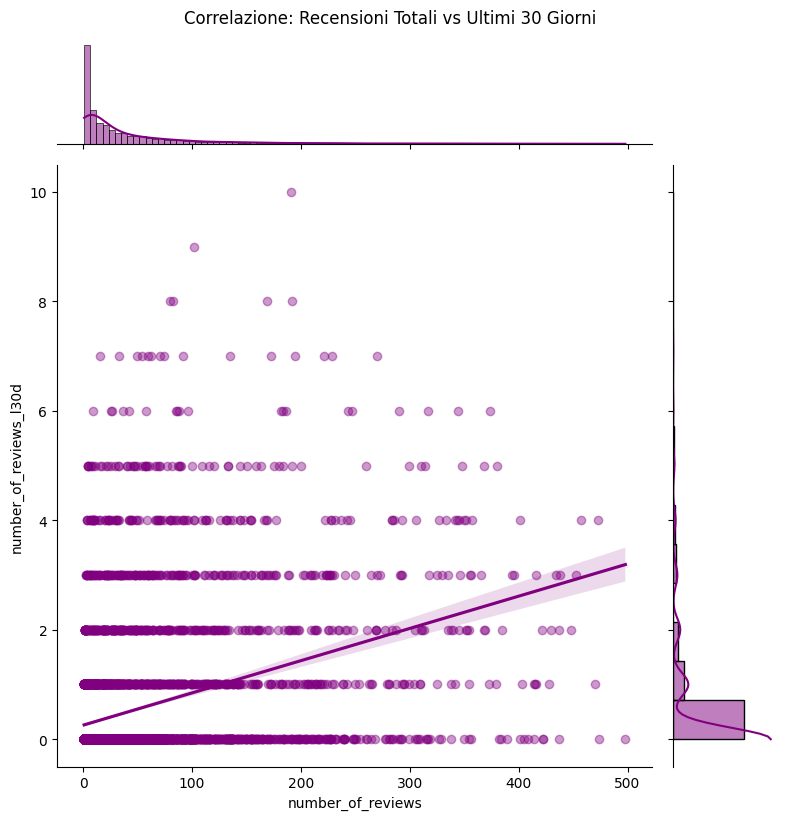

In [11]:
sns.jointplot(
    data=df_recensioni,
    x='number_of_reviews',
    y='number_of_reviews_l30d',
    kind='reg',
    height=8,
    color='purple',
    scatter_kws={'alpha':0.4}
)
plt.suptitle('Correlazione: Recensioni Totali vs Ultimi 30 Giorni', y=1.02)
plt.show()